# Energy Balance Model

This code is based on that created by Dr. David Archer and adapted by Tatsam Garg for TROP ICSU, https://tropicsu.org/lesson-plan-create-climate-model-with-py/.

In [33]:
#This imports the desired packages.
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#Setting up the main parameters
#Define your time interval size
timeStep = 10                      # years
waterDepth = 4000                  # meters
L = 1350                           # Watts/m^2 (Solar,Constant)
albedo = 0.3
epsilon = 1
sigma = 5.67*10**(-8)              # The Stefan-Boltzmann constant in units of W/m2 K^4
SpecificHeatCapacity = 4200        # (J/kg K) (for water)
Density = 1000                     # (kg/m^3) (for water)
Volume = waterDepth                # m^3 (of a water column with unit cross sectional area)
WaterColumnMass = Density * Volume #(kg/m^2)
HeatCapacity = SpecificHeatCapacity * WaterColumnMass #(J/m^2 K)
print("Heat capacity is : ", HeatCapacity, "J/m^2 K")

Heat capacity is :  16800000000 J/m^2 K


In [35]:
#Define the number of timesteps you want to take.
nSteps = 100
#Create empty arrays with as many spaces as the number of time steps you want to take.
#The np.zeros(size) command creates empty arrays
Heatrate = np.zeros(nSteps) #Heat content per unit time (as defined in equation 3)
HeatContent = np.zeros(nSteps) #Total heat content at each time step
T = np.zeros(nSteps) #Temperature

In [36]:
T[0] = 0 #Initial Temperature
HeatContent[0] = HeatCapacity * T[0] #Initial heat content (Heat content and Temperature are related by the heat capacity)

In [37]:
#Define a linear array whose elements are consecutive integers and range is the same as the number of time steps.
t = np.linspace(0, nSteps, nSteps)
#Now the time elapsed can simply be:
Time = t*timeStep # Time elapsed is nothing but integral multiples of the timeStep.

In [38]:
# A 'for' loop that iteratively determines different quantities of interest corresponding
# to each time step using the previous step's data.
for t in range (1, nSteps): # 't' has become our index
    Heatrate[t] = L*(1-albedo)/4 - epsilon * sigma * T[t-1]**4
    HeatContent[t] = HeatContent[t-1] + Heatrate[t] * 24*365*3600*timeStep
    T[t] = HeatContent[t] / HeatCapacity

In [39]:
Heatrate[t] = L*(1-albedo)/4 - epsilon * sigma * T[t-1]**4 #[t-1] indicates we're referring to the previous time step

In [40]:
HeatContent[t] = HeatContent[t-1] + Heatrate[t] * 24*365*3600*timeStep

In [41]:
T[t] = HeatContent[t] / HeatCapacity

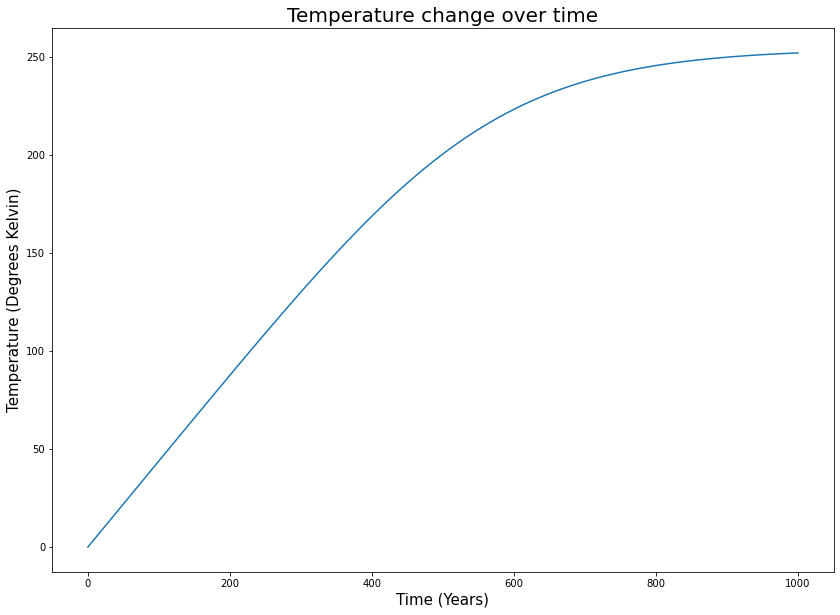

In [45]:
plt.plot(Time, T)
plt.rcParams['figure.figsize']=[14,10] # Function to control Figure size
plt.title("Temperature change over time", fontsize = '20')
plt.ylabel("Temperature (Degrees Kelvin)", fontsize='15')
#plt.ylabel("Temperature (Degrees Celcius)", fontsize='15') # Try doing an extra graph to show values in degrees Celcius so the result is more intuitive for participants more used to thinking in these degrees
plt.xlabel("Time (Years)", fontsize='15')
plt.show()
